# **Import Libraries**
Imports necessary libraries for data manipulation (pandas), database connection (sqlite3), and visualization (matplotlib, seaborn).

In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


# **Connect to Database and Query Data**
Connects to the SQLite database, queries four tables (StrategyReturns, AssetReturns, MarketCrashData, and AssetAllocation), and stores the results in pandas DataFrames. Closes the database connection afterward.

In [26]:
# Connect to the database (it will be created if it doesn't exist)
conn1 = sqlite3.connect('/content/sqlite.db')

# Create a cursor object
cursor = conn1.cursor()

# Query the data
strategy_returns_df = pd.read_sql_query("SELECT * FROM StrategyReturns", conn1)
asset_returns_df = pd.read_sql_query("SELECT * FROM AssetReturns", conn1)
market_crash_data_df = pd.read_sql_query("SELECT * FROM MarketCrashData", conn1)
asset_allocation_df = pd.read_sql_query("SELECT * FROM AssetAllocation", conn1)
conn1.commit()

# Close the database connection
conn1.close()


# Print DataFrames to Verify

In [27]:
# Print the dataframes to verify
print("Strategy Returns:\n", strategy_returns_df)
print('\n')
print("Asset Returns:\n", asset_returns_df)
print('\n')
print("Market Crash Data:\n", market_crash_data_df)
print('\n')
print("Asset Allocation:\n", asset_allocation_df)
print('\n')


Strategy Returns:
        Strategy  Return
0  Conservative     8.6
1        Income    10.2
2      Balanced    11.1
3        Growth    11.7
4    Aggressive    12.0


Asset Returns:
       Asset  Return
0  Equities    11.2
1     Bonds     7.9
2      Gold     6.9


Market Crash Data:
                      Crash  Equities  Bonds  Gold
0           Dot-com Bubble     -20.3    8.0  10.5
1  Global Financial Crisis     -39.4    9.2  26.7
2           COVID-19 Crash     -30.3    7.0  27.2


Asset Allocation:
        Strategy  Equities  Bonds  Gold
0  Conservative      10.0   80.0  10.0
1        Income      25.0   65.0  10.0
2      Balanced      45.0   40.0  15.0
3        Growth      60.0   25.0  15.0
4    Aggressive      75.0   10.0  15.0




# **Plot Strategy Returns vs Asset Returns**

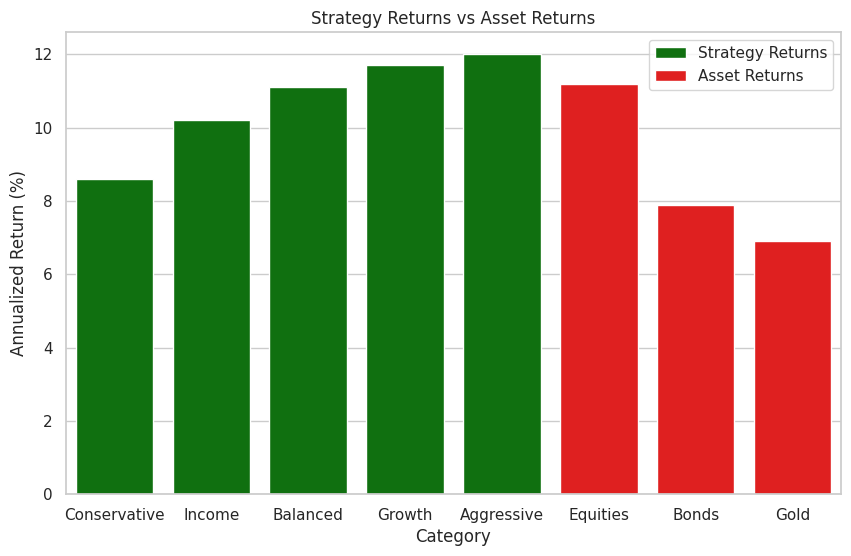

In [28]:
# Apply seaborn style
sns.set(style='whitegrid')

# Create a bar plot for strategy returns vs asset returns
plt.figure(figsize=(10, 6))
sns.barplot(x='Strategy', y='Return', data=strategy_returns_df, label='Strategy Returns', color='green')
sns.barplot(x='Asset', y='Return', data=asset_returns_df, label='Asset Returns', color='red')
plt.xlabel('Category')
plt.ylabel('Annualized Return (%)')
plt.title('Strategy Returns vs Asset Returns')
plt.legend()
plt.show()


# **INFERENCES**
*   Aggressive strategy offers the highest return (12%), while Conservative has the lowest (8%)
*  Equities perform well (11%) compared to other assets, followed by Bonds (7%) and Gold (6%).


---




In [30]:
# Calculate annualized market returns for each strategy during market crashes
# Melt the asset allocation data
asset_allocation_melted = asset_allocation_df.melt(id_vars=['Strategy'], var_name='Asset', value_name='Allocation')
print(asset_allocation_melted)
print('\n')
# Merge the market crash data with the asset allocation data
market_crash_data_melted = market_crash_data_df.melt(id_vars=['Crash'], var_name='Asset', value_name='CrashReturn')
print(market_crash_data_melted)
print('\n')
merged_crash_df = market_crash_data_melted.merge(asset_allocation_melted, on='Asset')
print(merged_crash_df)
print('\n')


        Strategy     Asset  Allocation
0   Conservative  Equities        10.0
1         Income  Equities        25.0
2       Balanced  Equities        45.0
3         Growth  Equities        60.0
4     Aggressive  Equities        75.0
5   Conservative     Bonds        80.0
6         Income     Bonds        65.0
7       Balanced     Bonds        40.0
8         Growth     Bonds        25.0
9     Aggressive     Bonds        10.0
10  Conservative      Gold        10.0
11        Income      Gold        10.0
12      Balanced      Gold        15.0
13        Growth      Gold        15.0
14    Aggressive      Gold        15.0


                     Crash     Asset  CrashReturn
0           Dot-com Bubble  Equities        -20.3
1  Global Financial Crisis  Equities        -39.4
2           COVID-19 Crash  Equities        -30.3
3           Dot-com Bubble     Bonds          8.0
4  Global Financial Crisis     Bonds          9.2
5           COVID-19 Crash     Bonds          7.0
6           Dot-com Bubb

**Description**:

Melts the AssetAllocation and MarketCrashData DataFrames to long format and merges them based on the asset.

# **Calculate and Print Annualized Crash Returns**

In [31]:
# Convert allocation percentages to proportions
merged_crash_df['Allocation'] = merged_crash_df['Allocation'] / 100

# Calculate the weighted returns for each strategy during each market crash
merged_crash_df['WeightedReturn'] = merged_crash_df['Allocation'] * merged_crash_df['CrashReturn']

# Sum the weighted returns to get the total return per strategy during each market crash
annualized_crash_returns_df = merged_crash_df.groupby(['Crash', 'Strategy'])['WeightedReturn'].sum().reset_index()
annualized_crash_returns_df.columns = ['Crash', 'Strategy', 'AnnualizedCrashReturn']

print("Annualized Market Returns during Crashes per Strategy:\n", annualized_crash_returns_df)
print('\n')


Annualized Market Returns during Crashes per Strategy:
                       Crash      Strategy  AnnualizedCrashReturn
0            COVID-19 Crash    Aggressive                -17.945
1            COVID-19 Crash      Balanced                 -6.755
2            COVID-19 Crash  Conservative                  5.290
3            COVID-19 Crash        Growth                -12.350
4            COVID-19 Crash        Income                 -0.305
5            Dot-com Bubble    Aggressive                -12.850
6            Dot-com Bubble      Balanced                 -4.360
7            Dot-com Bubble  Conservative                  5.420
8            Dot-com Bubble        Growth                 -8.605
9            Dot-com Bubble        Income                  1.175
10  Global Financial Crisis    Aggressive                -24.625
11  Global Financial Crisis      Balanced                -10.045
12  Global Financial Crisis  Conservative                  6.090
13  Global Financial Crisis       

# **Plot Annualized Market Returns during Crashes**

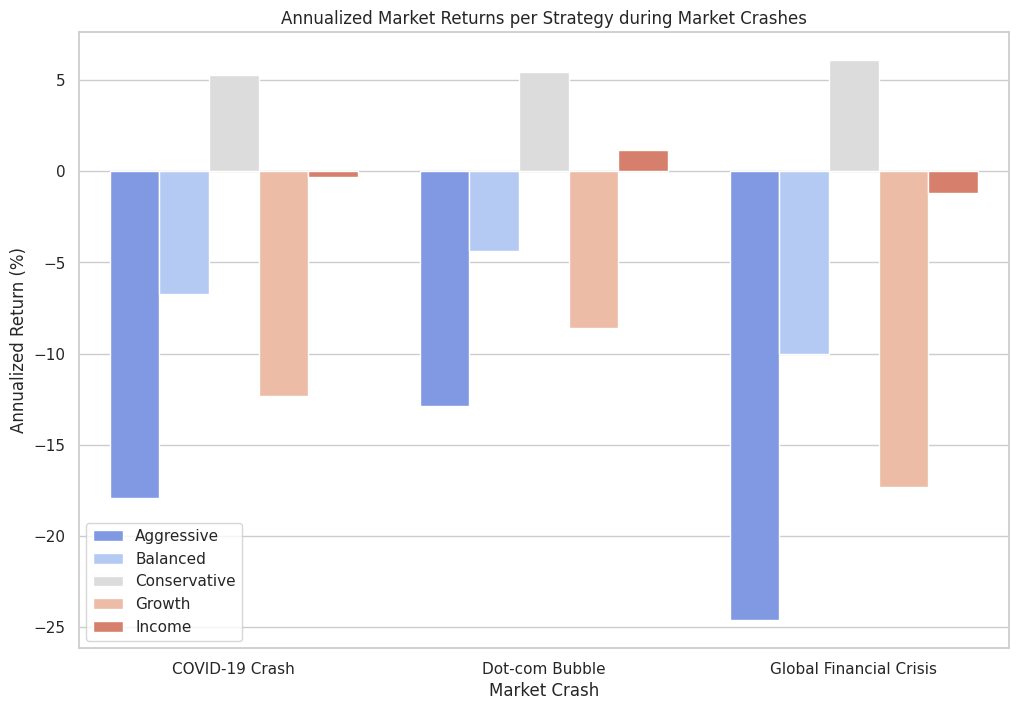

In [32]:
# Create a bar plot for the strategy returns during market crashes with a new color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Crash', y='AnnualizedCrashReturn', hue='Strategy', data=annualized_crash_returns_df, palette='coolwarm')
plt.xlabel('Market Crash')
plt.ylabel('Annualized Return (%)')
plt.title('Annualized Market Returns per Strategy during Market Crashes')
plt.legend()
plt.show()


# **INFERENCES**
* Aggressive strategy performs worst during crashes, with returns dropping to around -20% to -25%.
* Balanced and Conservative strategies are relatively more stable, but still experience negative returns.
* Income strategy shows the least volatility during market crashes, with less severe negative returns.


---





**Thanks For Your Time .**